# Final Insights
 ##### South America has largest total sales followed by Europe, North America, Asia. ActiveWear Smarthwatch is the product sold most by a large margin of around USD15,000. ActiveWear has overall good brand reputation in terms of selling products followed by SoundWave. In 2024, Q3 most of the sales happened, whereas Q4 was the quarter in which sales was low. On average, most of the customers spends less than USD 3500 in their lifetime. People shown most of the interest in buying books, followed by electronics, clothing and home decor. Most of customers are based in South America, followed by Europe, North America, Asia. Customer C0141 spent the most around USD 10500. Most of the customers don't to exceed payment of USD500 for each transaction or purchase. Avg transaction value in North Amreica is little less compared to other regions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows of each dataset
print("Customers Data")
print(customers.head())

print("\nProducts Data")
print(products.head())

print("\nTransactions Data")
print(transactions.head())

Customers Data
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127    

In [3]:

# Merge datasets for EDA
data = pd.merge(transactions, customers, on="CustomerID", how="left")
data = pd.merge(data, products, on="ProductID", how="left")
data = data.drop(columns=["Price_x"])
data = data.rename(columns={"Price_y": "Price"})

print(data.head())



  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue     CustomerName         Region  SignupDate  \
0      300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36  Travis Campbell  South America  2024-04-11   
4      902.04    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category   Price  
0  ComfortLiving Bluetooth Speaker  Electronics  300.68  
1  ComfortLiving Bluetooth Speaker  Electronics  300.68  
2  ComfortLiving Bluetooth Speak

In [5]:
# Handle missing values
print("\nMissing Values in Merged Data:")
print(data.isnull().sum())

# Fill missing values if needed (e.g., with "Unknown")
data.fillna("Unknown", inplace=True)

# Add a 'Month' column to analyze trends over time
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["Month"] = data["TransactionDate"].dt.to_period("M")



Missing Values in Merged Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price              0
dtype: int64


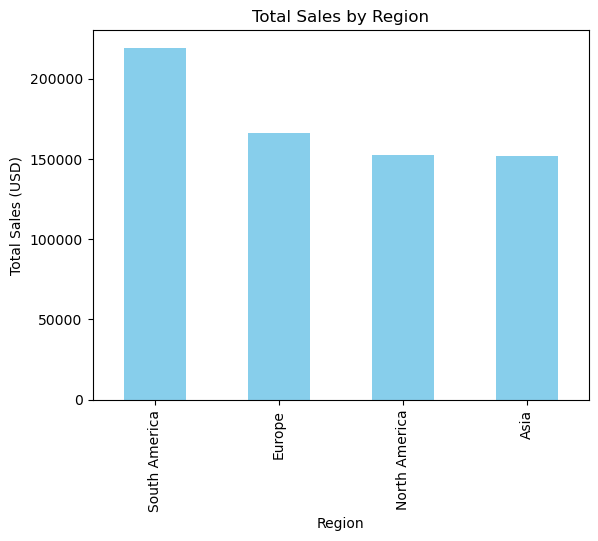

In [7]:
# 1. Distribution of Total Sales by Region
region_sales = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_sales.plot(kind="bar", title="Total Sales by Region", ylabel="Total Sales (USD)", color="skyblue")
plt.show()

#### South America has largest total sales followed by Europe, North America, Asia

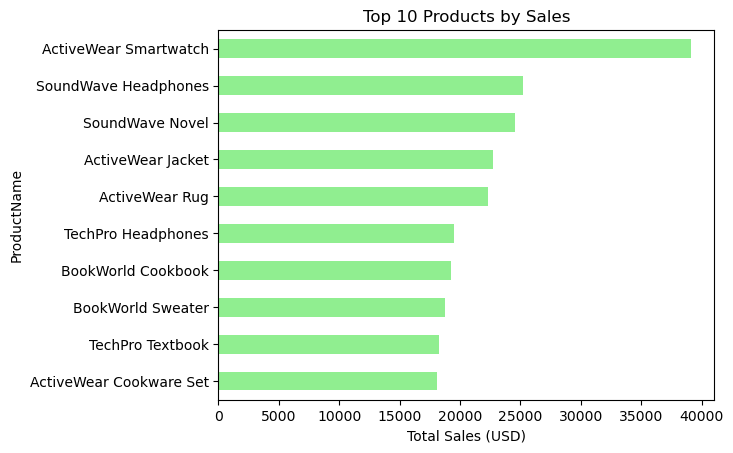

In [9]:
# 2. Top 10 Products by Sales
top_products = data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", title="Top 10 Products by Sales", xlabel="Total Sales (USD)", color="lightgreen")
plt.gca().invert_yaxis()
plt.show()

#### ActiveWear Smarthwatch is the product sold most by a large margin of around USD15,000. ActiveWear has overall good brand reputation in terms of selling products followed by SoundWave

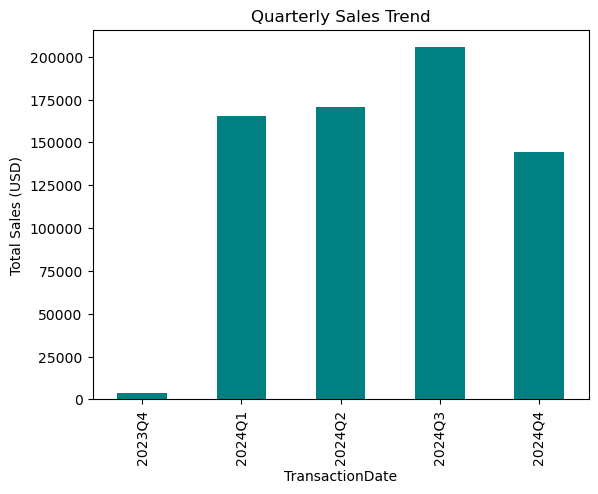

In [31]:
# 3. Sales Trends Over Time (Monthly/Quarterly/Yearly)
quarterly_sales = data.groupby(data["TransactionDate"].dt.to_period("Q"))["TotalValue"].sum()
quarterly_sales.plot(kind="bar", title="Quarterly Sales Trend", ylabel="Total Sales (USD)", color="teal")
plt.show()

#### In 2024, Q3 most of the sales happened, whereas Q4 was the quarter in which sales was low.

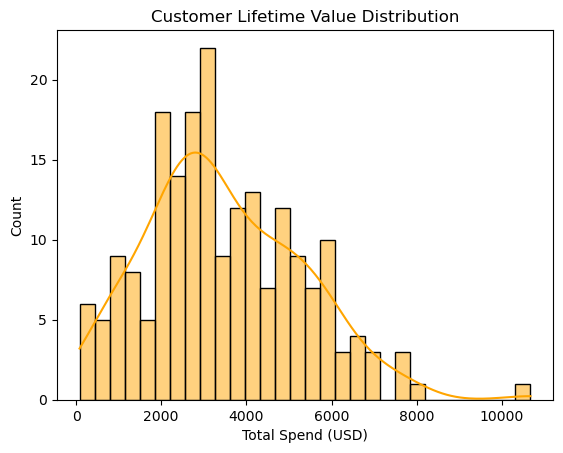

In [13]:
# 4. Customer Lifetime Value (CLTV) Distribution
cltv = data.groupby("CustomerID")["TotalValue"].sum()
sns.histplot(cltv, bins=30, kde=True, color="orange")
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("Total Spend (USD)")
plt.show()


#### On average, most of the customers spends less than USD 3500 in their lifetime 

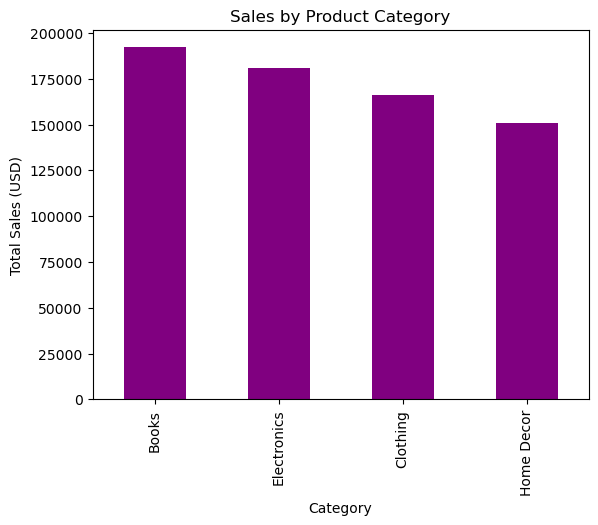

In [15]:
# 5. Popular Product Categories
category_sales = data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar", title="Sales by Product Category", ylabel="Total Sales (USD)", color="purple")
plt.show()

#### People shown most of the interest in buying books, followed by electronics, clothing and home decor

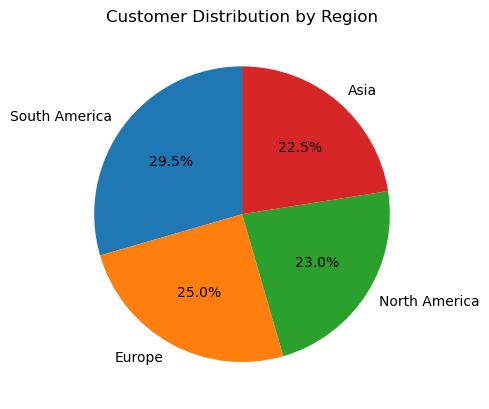

In [17]:
# 6. Distribution of Customers by Region
region_customers = customers["Region"].value_counts()
region_customers.plot(kind="pie", title="Customer Distribution by Region", autopct="%1.1f%%", startangle=90)
plt.ylabel("")  # Hide y-axis label
plt.show()



#### Most of customers are based in South America, followed by Europe, North America, Asia

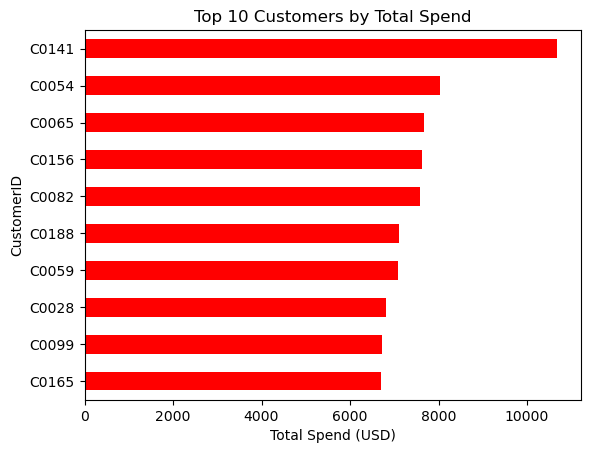

In [19]:
# 7. Top Customers by Total Spend (CLTV)
top_customers = cltv.sort_values(ascending=False).head(10)
top_customers.plot(kind="barh", title="Top 10 Customers by Total Spend", xlabel="Total Spend (USD)", color="red")
plt.gca().invert_yaxis()
plt.show()

#### C0141 spent the most around $10500

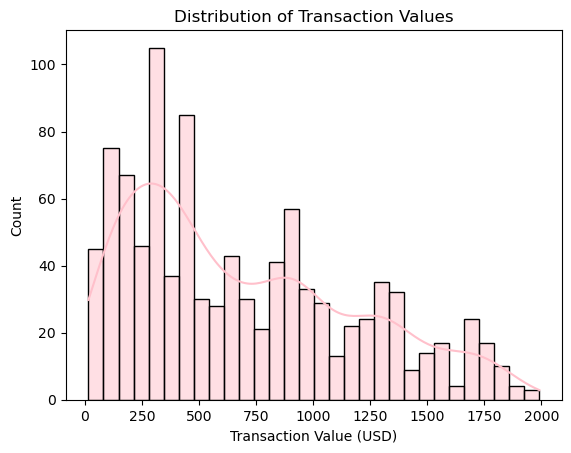

In [23]:
# 8. Distribution of Transaction Values
sns.histplot(data["TotalValue"], bins=30, kde=True, color="pink")
plt.title("Distribution of Transaction Values")
plt.xlabel("Transaction Value (USD)")
plt.show()


#### Most of the customers don't to exceed payment of $500 for each transaction or purchase.

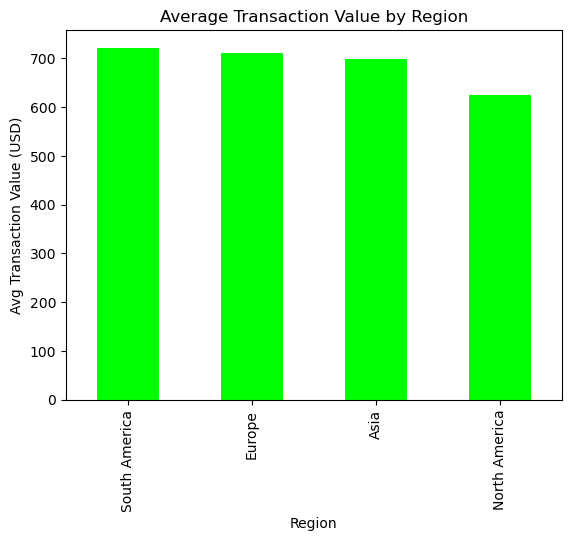

In [25]:
# 10. Comparison of Average Transaction Value Across Regions
avg_transaction_value = data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
avg_transaction_value.plot(kind="bar", title="Average Transaction Value by Region", ylabel="Avg Transaction Value (USD)", color="lime")
plt.show()

#### Avg transaction value in North Amreica is little less compared to other regions.

# Final Insights
 ##### South America has largest total sales followed by Europe, North America, Asia. ActiveWear Smarthwatch is the product sold most by a large margin of around USD15,000. ActiveWear has overall good brand reputation in terms of selling products followed by SoundWave. In 2024, Q3 most of the sales happened, whereas Q4 was the quarter in which sales was low. On average, most of the customers spends less than USD 3500 in their lifetime. People shown most of the interest in buying books, followed by electronics, clothing and home decor. Most of customers are based in South America, followed by Europe, North America, Asia. Customer C0141 spent the most around USD 10500. Most of the customers don't to exceed payment of USD500 for each transaction or purchase. Avg transaction value in North Amreica is little less compared to other regions.
